In [1]:
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt

In [2]:
img = cv2.imread('./sourceImages/W_A1_0_3.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGBA)

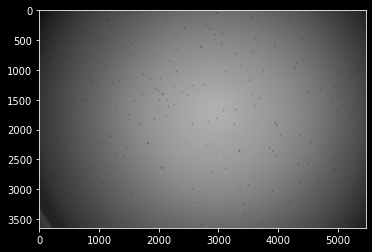

In [3]:
plt.imshow(img)

In [4]:
grayImg = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

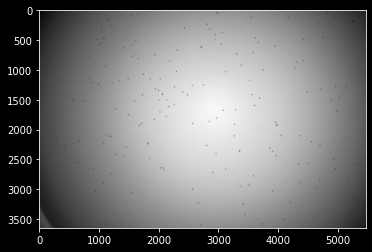

In [64]:
plt.imshow(grayImg, cmap='gray')

In [25]:
hist, bin_edges = np.histogram(grayImg.flatten(), bins=range(256), density=True)

<BarContainer object of 255 artists>

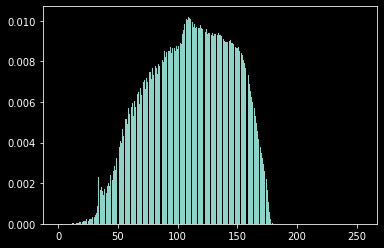

In [27]:
plt.bar(bin_edges[:-1], height=hist)

<BarContainer object of 255 artists>

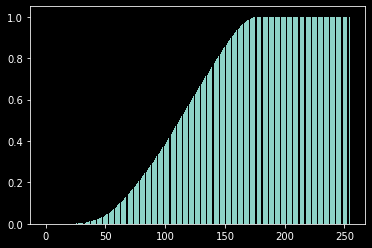

In [28]:
plt.bar(bin_edges[:-1], height=np.cumsum(hist))

In [56]:
newScale = np.max(grayImg) * np.cumsum(hist)
newScale = np.concatenate([newScale, [newScale[-1]]], axis=0)
newScale = newScale.astype(np.uint8)

In [58]:
newGrayImg = newScale[grayImg]

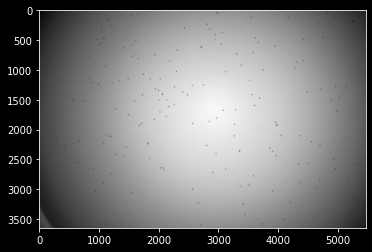

In [65]:
plt.imshow(grayImg, cmap='gray')

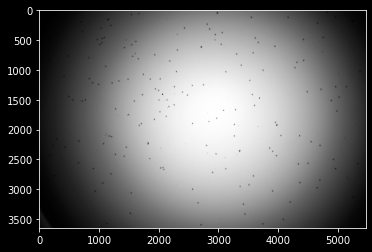

In [66]:
plt.imshow(newGrayImg, cmap='gray')

In [ ]:
hist, bin_edges = np.histogram(newGrayImg.flatten(), bins=range(256), density=True)
plt.bar(bin_edges[:-1], height=hist)